In [1]:
pip install pandas

You should consider upgrading via the '/mnt/c/Users/irvif/dev/data-visualization/.env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyxlsb

You should consider upgrading via the '/mnt/c/Users/irvif/dev/data-visualization/.env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
def get_gla_lts_rd(input_file_path):
    # We only get the LTS roads which located on sheet 1
    df_sheet_laei_lts_rd = pd.read_excel(input_file_path, sheet_name=1)
    df_sheet_laei_lts_rd_gla = df_sheet_laei_lts_rd[df_sheet_laei_lts_rd['BoroughName_ExactCut'] != "NonGLA"]
    return df_sheet_laei_lts_rd_gla

In [5]:
df_sheet_laei_2016_lts_rd_input_file_path = 'data/raw/raw/greater-london-area/LAEI_2016_Detailed_Road_Transport_MajorRoads_Excel/Link/LAEI2016_MajorRoads_EmissionsbyLink_2016.xlsb'
df_sheet_laei_2016_lts_rd_gla = get_gla_lts_rd(df_sheet_laei_2016_lts_rd_input_file_path)

In [6]:
df_sheet_laei_2016_lts_rd_gla.head()

,GridId,Toid,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,DoT ID,Length (m),Emissions,Year,Pollutant,...,Diesel Car,Electric Car,Petrol LGV,Diesel LGV,Electric LGV,TfL Bus,Coach,Rigid HGV,Artic HGV,Total
20,6447,4000000027865921,526,Outer,Enfield,27883,233.431466,DFT,2016,CO2,...,571.381133,0.0,6.864563,212.556255,0.0,0.0,38.417863,274.010807,869.410394,2422.443915
21,6449,4000000027865921,528,Outer,Enfield,27883,556.683238,DFT,2016,CO2,...,1362.619638,0.0,16.370489,506.900403,0.0,0.0,91.618240,653.456134,2073.354555,5777.001472
22,6448,4000000027865921,1222,Outer,Enfield,27883,514.969431,DFT,2016,CO2,...,1260.514797,0.0,15.143803,468.916961,0.0,0.0,84.753034,604.490867,1917.992391,5344.114850
23,6621,4000000027865921,1893,Outer,Enfield,27883,13.845766,DFT,2016,CO2,...,33.890930,0.0,0.407165,12.607573,0.0,0.0,2.278719,16.252691,51.568253,143.684962
24,6622,4000000027865921,2583,Outer,Enfield,27883,133.474744,DFT,2016,CO2,...,326.712382,0.0,3.925117,121.538420,0.0,0.0,21.967109,156.677773,497.123765,1385.139227


In [49]:
df_sheet_laei_2016_lts_rd_gla.columns

Index(['GridId', 'Toid', 'GRID_ExactCut_ID', 'Location_ExactCut',
       'BoroughName_ExactCut', 'DoT ID', 'Length (m)', 'Emissions', 'Year',
       'Pollutant', 'Emissions Unit', 'Motorcycle', 'Taxi', 'Petrol Car',
       'Diesel Car', 'Electric Car', 'Petrol LGV', 'Diesel LGV',
       'Electric LGV', 'TfL Bus', 'Coach', 'Rigid HGV', 'Artic HGV', 'Total'],
      dtype='object')

In [50]:
road_emission_attr = [
    'BoroughName_ExactCut',
    'Length (m)',
    'Emissions',
    'Year',
    'Pollutant',
    'Motorcycle',
    'Taxi',
    'Petrol Car',
    'Diesel Car',
    'Electric Car',
    'Petrol LGV',
    'Diesel LGV',
    'Electric LGV',
    'TfL Bus',
    'Coach',
    'Rigid HGV',
    'Artic HGV',
    'Total',
    'GRID_ExactCut_ID',
    'DoT ID',
    'Toid'
]

In [52]:
laei_columns_mapping = {
    'BoroughName_ExactCut': 'borough',
    'Length (m)': 'length',
    'Emissions': 'emission',
    'Year': 'year',
    'Pollutant': 'pollutant',
    'Motorcycle': 'motorcycle',
    'Taxi': 'taxi',
    'Petrol Car': 'petrol_car',
    'Diesel Car': 'diesel_car',
    'Electric Car': 'electric_car',
    'Petrol LGV': 'petrol_lgv',
    'Diesel LGV': 'diesel_lgv',
    'Electric LGV': 'electric_lgv',
    'TfL Bus': 'tfl_bus',
    'Coach': 'coach',
    'Rigid HGV': 'rigid_hgv',
    'Artic HGV': 'artic_hgv',
    'Total': 'total',
    'GRID_ExactCut_ID': 'grid_id',
    'DoT ID': 'dot_id',
    'Toid': 'toid',
}

In [53]:
df_sheet_laei_2016_lts_rd_gla_copy = df_sheet_laei_2016_lts_rd_gla.copy()[road_emission_attr]
df_sheet_laei_2016_lts_rd_gla_copy = df_sheet_laei_2016_lts_rd_gla_copy.rename(columns=laei_columns_mapping)
df_sheet_laei_2016_lts_rd_gla_copy = df_sheet_laei_2016_lts_rd_gla_copy.sort_values(by=['borough'])
df_sheet_laei_2016_lts_rd_gla_copy.head()

,borough,length,emission,year,pollutant,motorcycle,taxi,petrol_car,diesel_car,electric_car,...,diesel_lgv,electric_lgv,tfl_bus,coach,rigid_hgv,artic_hgv,total,grid_id,dot_id,toid
343477,Barking and Dagenham,10.563642,COPERT,2016,PM25_Brake,0.000012,1.646184e-05,0.000847,0.000578,2.394834e-06,...,1.770658e-04,2.962596e-07,0.000265,0.000000,0.000166,0.000014,0.002081,1434,6658,4000000030430915
456536,Barking and Dagenham,0.000000,COPERT,2016,PM25_Resusp,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2849,99902,4000000031048640
456537,Barking and Dagenham,14.113797,COPERT,2016,PM25_Resusp,0.000000,2.280227e-07,0.000011,0.000008,3.164465e-08,...,2.273827e-06,3.804479e-09,0.000052,0.000016,0.000033,0.000005,0.000128,2176,7518,4000000031048641
456538,Barking and Dagenham,14.355092,COPERT,2016,PM25_Resusp,0.000000,2.319211e-07,0.000011,0.000008,3.218566e-08,...,2.312701e-06,3.869522e-09,0.000052,0.000017,0.000034,0.000005,0.000130,2176,7518,4000000031048642
456539,Barking and Dagenham,5.825940,COPERT,2016,PM25_Resusp,0.000000,9.412398e-08,0.000005,0.000003,1.306238e-08,...,9.385979e-07,1.570425e-09,0.000021,0.000007,0.000014,0.000002,0.000053,792,7518,4000000031048643


In [54]:
from pathlib import Path
# All in killotonne
laei_2016_lts_rd_gla_file_path = Path('data/laei_2016_lts_rd_gla.csv')  
laei_2016_lts_rd_gla_file_path.parent.mkdir(parents=True, exist_ok=True)
df_sheet_laei_2016_lts_rd_gla_copy.to_csv(laei_2016_lts_rd_gla_file_path, index=False)  

In [55]:
def get_gla_tree_map(input_file_path):
    # We only have 1 sheet here
    tree_attr = [
    'borough',
    'load_date',
    'longitude',
    'latitude'
    ]
    df_sheet_gla_tree_map = pd.read_csv(input_file_path, encoding='latin1')
    df_sheet_gla_tree_map = df_sheet_gla_tree_map[tree_attr]
    return df_sheet_gla_tree_map

In [56]:
df_sheet_gla_tree_map_2018_file_path = 'data/raw/raw/greater-london-area/green-spaces/london_street_trees_gla_20180214.csv'
df_sheet_gla_tree_map_2018 = get_gla_tree_map(df_sheet_gla_tree_map_2018_file_path)
df_sheet_gla_tree_map_2018.head()

/tmp/ipykernel_8179/3801970831.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sheet_gla_tree_map = pd.read_csv(input_file_path, encoding='latin1')


,borough,load_date,longitude,latitude
0,Barking,20180214,0.139454,51.585695
1,Barking,20180214,0.139123,51.585670
2,Barking,20180214,0.139004,51.585689
3,Barking,20180214,0.139134,51.585732
4,Barking,20180214,0.139288,51.585819


In [25]:
from pathlib import Path
gla_tree_map_2018_file_path = Path('data/gla_tree_map_2018.csv')  
gla_tree_map_2018_file_path.parent.mkdir(parents=True, exist_ok=True)
df_sheet_gla_tree_map_2018.to_csv(gla_tree_map_2018_file_path, index=False)  

In [26]:
pip install numpy

You should consider upgrading via the '/mnt/c/Users/irvif/dev/data-visualization/.env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install matplotlib

     |████████████████████████████████| 11.3 MB 3.7 MB/s            
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 895 kB 23.4 MB/s            
     |████████████████████████████████| 4.3 MB 17.8 MB/s            
  Using cached kiwisolver-1.3.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
You should consider upgrading via the '/mnt/c/Users/irvif/dev/data-visualization/.env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 2.6 MB/s            
     |████████████████████████████████| 5.8 MB 34.7 MB/s            
     |████████████████████████████████| 1.1 MB 19.0 MB/s            
     |████████████████████████████████| 16.6 MB 39.4 MB/s            
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
You should consider upgrading via the '/mnt/c/Users/irvif/dev/data-visualization/.env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [123]:
# set the filepath and load in a shapefile
map_file_path = "data/geo-data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"

map_df = gpd.read_file(map_file_path)
map_df

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18..."
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19..."
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19..."
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18..."
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.900 198355.200, 524594.300 19..."


<AxesSubplot:>

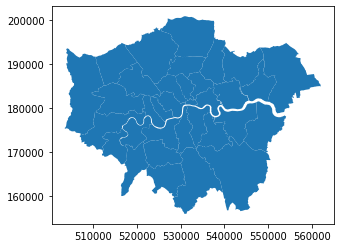

In [124]:
map_df.plot()

In [37]:
df_sheet_laei_2016_lts_rd_gla_copy.head()

,borough,length,emission,year,pollutant,motorcycle,taxi,petrol_car,diesel_car,electric_car,petrol_lgv,diesel_lgv,electric_lgv,tfl_bus,coach,rigid_hgv,artic_hgv,total
343477,Barking and Dagenham,10.563642,COPERT,2016,PM25_Brake,0.000012,1.646184e-05,0.000847,0.000578,2.394834e-06,2.271715e-06,1.770658e-04,2.962596e-07,0.000265,0.000000,0.000166,0.000014,0.002081
456536,Barking and Dagenham,0.000000,COPERT,2016,PM25_Resusp,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
456537,Barking and Dagenham,14.113797,COPERT,2016,PM25_Resusp,0.000000,2.280227e-07,0.000011,0.000008,3.164465e-08,2.917270e-08,2.273827e-06,3.804479e-09,0.000052,0.000016,0.000033,0.000005,0.000128
456538,Barking and Dagenham,14.355092,COPERT,2016,PM25_Resusp,0.000000,2.319211e-07,0.000011,0.000008,3.218566e-08,2.967145e-08,2.312701e-06,3.869522e-09,0.000052,0.000017,0.000034,0.000005,0.000130
456539,Barking and Dagenham,5.825940,COPERT,2016,PM25_Resusp,0.000000,9.412398e-08,0.000005,0.000003,1.306238e-08,1.204201e-08,9.385979e-07,1.570425e-09,0.000021,0.000007,0.000014,0.000002,0.000053


In [38]:
df_sheet_laei_2016_lts_rd_gla_copy['pollutant'].unique()

array(['PM25_Brake', 'PM25_Resusp', 'NOx', 'PM10_Exhaust', 'PM25_Tyre',
       'PM25_Exhaust', 'PM10_Tyre', 'PM10_Brake', 'PM10_Resusp', 'CO2'],
      dtype=object)

In [62]:
df_sheet_laei_2016_lts_rd_gla_copy['toid'].unique()

array([4000000030430915, 4000000031048640, 4000000031048641, ...,
       4000000030321737, 4000000030321969, 4000000030321735])

In [69]:
# High pollutant in each of borough based on available street information
summarized_parameters = [
    'length',
    'motorcycle',
    'taxi',
    'petrol_car',
    'diesel_car',
    'electric_car',
    'petrol_lgv',
    'diesel_lgv', 
    'electric_lgv',
    'total']
summary_of_pollutant_per_borough = df_sheet_laei_2016_lts_rd_gla_copy.groupby(by=['borough', 'pollutant', 'year', 'toid'], as_index=False)[summarized_parameters].sum()

In [70]:
summary_of_pollutant_per_borough

,borough,pollutant,year,toid,length,motorcycle,taxi,petrol_car,diesel_car,electric_car,petrol_lgv,diesel_lgv,electric_lgv,total
0,Barking and Dagenham,CO2,2016,4000000030076500,220.100486,7.592021,9.196101,324.907785,194.539275,0.000000e+00,1.492897e+00,116.549879,0.000000e+00,726.789077
1,Barking and Dagenham,CO2,2016,4000000030082641,362.578730,20.316954,21.413225,662.046438,389.509927,0.000000e+00,3.562255e+00,309.867444,0.000000e+00,2394.928459
2,Barking and Dagenham,CO2,2016,4000000030082642,362.646021,20.971796,21.698211,690.146189,413.535733,0.000000e+00,3.753825e+00,313.599333,0.000000e+00,2520.273193
3,Barking and Dagenham,CO2,2016,4000000030082838,112.860042,3.273125,6.275125,223.007497,134.146868,0.000000e+00,1.473551e+00,113.660418,0.000000e+00,785.229639
4,Barking and Dagenham,CO2,2016,4000000030082839,112.152520,3.358130,6.219181,231.785896,142.037577,0.000000e+00,1.550103e+00,115.815228,0.000000e+00,817.444758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399895,Wandsworth,PM25_Tyre,2016,4000000031271450,5.261855,0.000006,0.000022,0.000109,0.000075,3.090346e-07,7.180546e-07,0.000056,9.364314e-08,0.000300
399896,Wandsworth,PM25_Tyre,2016,4000000031273584,16.145197,0.000015,0.000048,0.000247,0.000168,6.969947e-07,1.487527e-06,0.000116,1.939917e-07,0.000708
399897,Wandsworth,PM25_Tyre,2016,4000000031273585,16.635245,0.000015,0.000049,0.000254,0.000173,7.181502e-07,1.532677e-06,0.000119,1.998799e-07,0.000729
399898,Wandsworth,PM25_Tyre,2016,4000000031273587,5.927527,0.000005,0.000018,0.000091,0.000062,2.568492e-07,5.478179e-07,0.000043,7.144218e-08,0.000261


In [98]:
def generate_plot_based_on_pollutant(summary_of_pollutant_per_borough, pollutant):
    # Pollution attribution per borough in kilotonne/year
    summary_of_pollutant_per_borough[summary_of_pollutant_per_borough['pollutant'] == pollutant].groupby(['borough']).sum().plot(kind='bar', y='total')

This is chart for CO2
This is chart for NOx
This is chart for PM10_Brake
This is chart for PM10_Exhaust
This is chart for PM10_Resusp
This is chart for PM10_Tyre
This is chart for PM25_Brake
This is chart for PM25_Exhaust
This is chart for PM25_Resusp
This is chart for PM25_Tyre


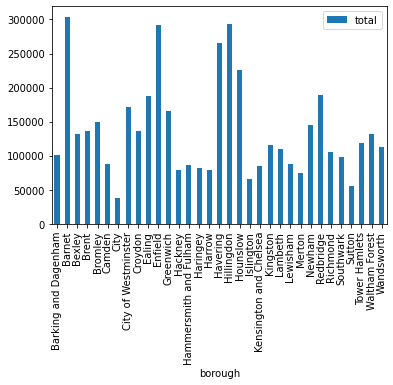

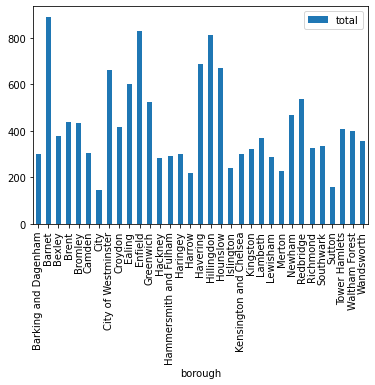

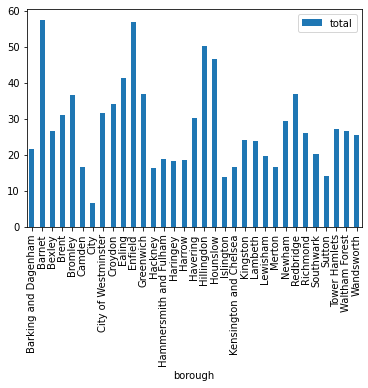

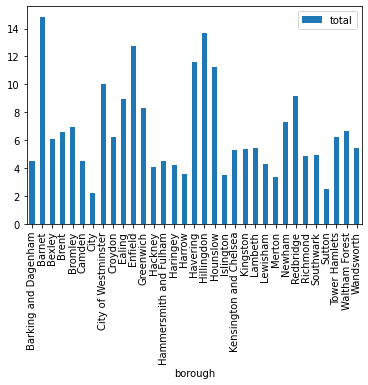

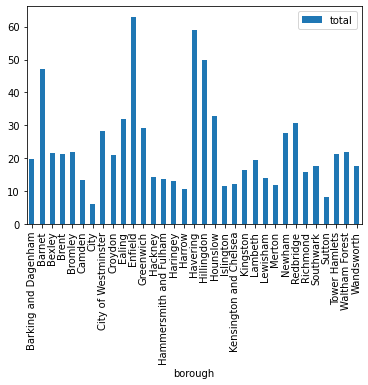

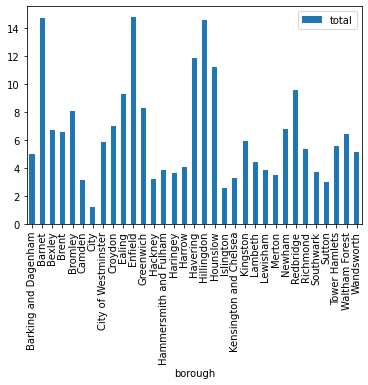

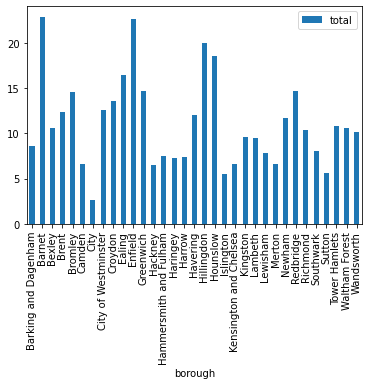

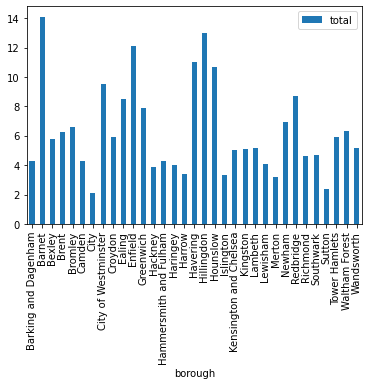

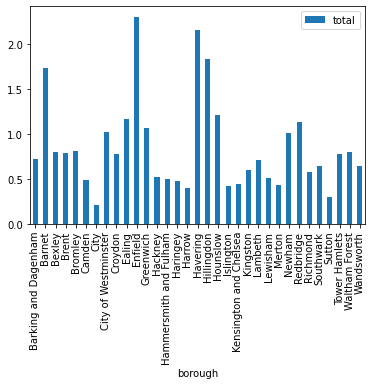

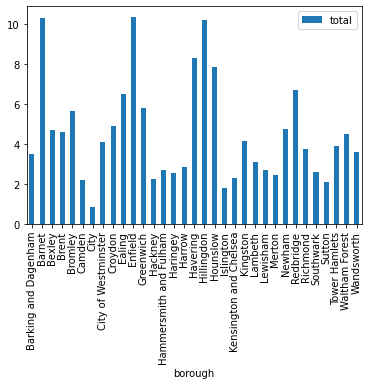

In [106]:
pollutants = list(summary_of_pollutant_per_borough['pollutant'].unique())
for pollutant in pollutants:
    print("This is chart for {pollutant}".format(pollutant=pollutant))
    generate_plot_based_on_pollutant(summary_of_pollutant_per_borough, pollutant)

In [139]:
def get_summary_based_on_pollutant(summary_of_pollutant_per_borough, pollutant):
    sm = summary_of_pollutant_per_borough[summary_of_pollutant_per_borough['pollutant'] == pollutant].groupby(['borough', 'year'], as_index=False).sum()
    return sm

In [144]:
pollutant = 'CO2'
sm_co2 = get_summary_based_on_pollutant(summary_of_pollutant_per_borough, pollutant)
sm_co2

,borough,year,toid,length,motorcycle,taxi,petrol_car,diesel_car,electric_car,petrol_lgv,diesel_lgv,electric_lgv,total
0,Barking and Dagenham,2016,3512000026817707008,41435.420260,522.105094,992.885255,35211.449327,21613.295506,0.0,161.941266,11958.888919,0.0,101319.012133
1,Barnet,2016,9132000069588072448,116482.862503,2245.723414,8932.519422,116687.389914,71193.306903,0.0,485.442565,37397.473381,0.0,303882.904691
2,Bexley,2016,5524000042149153792,76716.551923,946.104038,1327.868682,50671.944675,30912.067598,0.0,226.708726,17204.250907,0.0,132281.597659
3,Brent,2016,5000000038069010432,58629.050435,1071.565859,6591.040962,48440.061631,29808.251652,0.0,216.230831,15428.197852,0.0,136850.436074
4,Bromley,2016,6124000046570431488,113851.162321,1136.659601,1491.302382,60558.482384,37776.099845,0.0,257.973277,18782.227351,0.0,149243.889970
5,Camden,2016,4488000034247676416,43745.983219,2084.997471,9092.663243,22027.556261,13629.169241,0.0,146.143134,10139.251856,0.0,87406.095127
6,City,2016,1848000014097089792,14868.032960,1306.720359,6974.559675,5626.507905,4173.867670,0.0,74.016689,5155.622572,0.0,37682.708606
7,City of Westminster,2016,6924000052787206144,63603.387369,3900.552394,29244.015276,31796.959930,20388.241868,0.0,275.036999,19177.261533,0.0,171948.128450
8,Croydon,2016,6324000048099355648,92465.976572,1016.927221,1323.412013,52313.474912,32647.441883,0.0,223.202705,15774.123988,0.0,136071.829457
9,Ealing,2016,4816000036629067776,64873.372563,1637.983729,5176.270073,67365.979328,41194.965261,0.0,316.285940,23092.032882,0.0,187767.634581


In [222]:
# This is only for CO2 data
merged = map_df.copy().set_index('NAME').join(sm_co2.set_index('borough'))
merged = merged.fillna(0)
merged

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,year,toid,length,motorcycle,taxi,petrol_car,diesel_car,electric_car,petrol_lgv,diesel_lgv,electric_lgv,total
NAME,,,,,,,,,,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,0,0,"POLYGON ((516401.600 160201.800, 516407.300 16...",0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
Croydon,E09000008,8649.441,0.000,F,0,0,"POLYGON ((535009.200 159504.700, 535005.500 15...",2016.0,6.324000e+18,92465.976572,1016.927221,1323.412013,52313.474912,32647.441883,0.0,223.202705,15774.123988,0.0,136071.829457
Bromley,E09000006,15013.487,0.000,F,0,0,"POLYGON ((540373.600 157530.400, 540361.200 15...",2016.0,6.124000e+18,113851.162321,1136.659601,1491.302382,60558.482384,37776.099845,0.0,257.973277,18782.227351,0.0,149243.889970
Hounslow,E09000018,5658.541,60.755,F,0,0,"POLYGON ((521975.800 178100.000, 521967.700 17...",2016.0,6.920000e+18,89405.054654,2074.584068,9620.845194,88360.452622,54202.519518,0.0,345.719436,26050.111065,0.0,225499.020028
Ealing,E09000009,5554.428,0.000,F,0,0,"POLYGON ((510253.500 182881.600, 510249.900 18...",2016.0,4.816000e+18,64873.372563,1637.983729,5176.270073,67365.979328,41194.965261,0.0,316.285940,23092.032882,0.0,187767.634581
Havering,E09000016,11445.735,210.763,F,0,0,"POLYGON ((549893.900 181459.800, 549894.600 18...",2016.0,3.804000e+18,76872.364155,1065.109896,2508.365137,75127.093725,60348.298445,0.0,613.260437,31143.568294,0.0,265798.546552
Hillingdon,E09000017,11570.063,0.000,F,0,0,"POLYGON ((510599.800 191689.500, 510615.200 19...",2016.0,6.336000e+18,104430.593857,1565.062828,4798.798769,113361.902355,76953.513998,0.0,484.831137,31260.385707,0.0,292720.420798
Harrow,E09000015,5046.330,0.000,F,0,0,"POLYGON ((510599.800 191689.500, 510660.000 19...",2016.0,4.384000e+18,52958.526225,375.248370,818.989262,33649.607341,20991.103072,0.0,106.590302,7851.784644,0.0,79645.823943
Brent,E09000005,4323.270,0.000,F,0,0,"POLYGON ((525201.000 182512.600, 525181.500 18...",2016.0,5.000000e+18,58629.050435,1071.565859,6591.040962,48440.061631,29808.251652,0.0,216.230831,15428.197852,0.0,136850.436074


<AxesSubplot:>

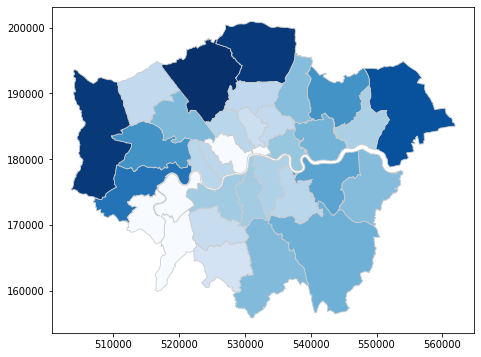

In [223]:
variable = 'total'

# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [167]:
def get_diseases_data_prediction(input_file_path):
    df_diseases_data_prediction = pd.read_csv(input_file_path)
    columns_mapping = {
    'Year': 'year',
    'Disease': 'disease',
    'AgeGroup': 'age_group',
    'Incidence': 'incidence',
    '95% CL': 'above_threshold',
    'Borough': 'borough'
    }
    df_diseases_data_prediction = df_diseases_data_prediction.rename(columns=columns_mapping)
    return df_diseases_data_prediction

In [186]:
diseases_data_prediction_input_file_path = 'data/diseases.csv'
diseases_data_prediction= get_diseases_data_prediction(diseases_data_prediction_input_file_path)
diseases_data_prediction.head()

,year,disease,age_group,incidence,above_threshold,borough
0,2016,childhood asthma,0-5,122,1,Barking
1,2016,childhood asthma,06-17,98,1,Barking
2,2016,childhood asthma,18-64,0,0,Barking
3,2016,childhood asthma,65+,0,0,Barking
4,2016,adult asthma,0-5,0,0,Barking


In [187]:
def get_diseases_insight_based_on_filter(diseases_data_prediction, filters):
    sm = diseases_data_prediction.groupby(filters, as_index=False).sum()
    return sm

In [188]:
diseases_summary = get_diseases_insight_based_on_filter(diseases_data_prediction, ['borough', 'disease', 'year', 'above_threshold'])
diseases_summary.head()

,borough,disease,year,above_threshold,incidence
0,Barking,adult asthma,2016,0,17
1,Barking,adult asthma,2016,1,114
2,Barking,adult asthma,2017,0,16
3,Barking,adult asthma,2017,1,114
4,Barking,adult asthma,2018,0,16


In [189]:
diseases_summary_with_low_pollutant = diseases_summary[diseases_summary['above_threshold']==0]
diseases_summary_with_low_pollutant = diseases_summary_with_low_pollutant.drop(['above_threshold'], axis=1)
diseases_summary_with_low_pollutant.head()

,borough,disease,year,incidence
0,Barking,adult asthma,2016,17
2,Barking,adult asthma,2017,16
4,Barking,adult asthma,2018,16
6,Barking,childhood asthma,2016,0
8,Barking,childhood asthma,2017,0


In [190]:
diseases_summary_with_high_pollutant = diseases_summary[diseases_summary['above_threshold']==1]
diseases_summary_with_high_pollutant = diseases_summary_with_high_pollutant.drop(['above_threshold'], axis=1)
diseases_summary_with_high_pollutant.head()

,borough,disease,year,incidence
1,Barking,adult asthma,2016,114
3,Barking,adult asthma,2017,114
5,Barking,adult asthma,2018,113
7,Barking,childhood asthma,2016,220
9,Barking,childhood asthma,2017,219


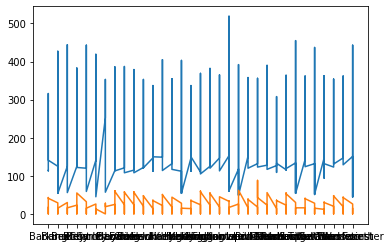

In [197]:
# Those with higher exposure will have larger incidence
plt.plot(diseases_summary_with_high_pollutant['borough'], diseases_summary_with_high_pollutant['incidence'])
plt.plot(diseases_summary_with_low_pollutant['borough'], diseases_summary_with_low_pollutant['incidence'])
plt.show()

In [206]:
# See the tree data
df_sheet_gla_tree_map_2018.head()

,borough,load_date,longitude,latitude
0,Barking,20180214,0.139454,51.585695
1,Barking,20180214,0.139123,51.585670
2,Barking,20180214,0.139004,51.585689
3,Barking,20180214,0.139134,51.585732
4,Barking,20180214,0.139288,51.585819


In [212]:
tree_summary = df_sheet_gla_tree_map_2018.groupby(['borough', 'load_date'], as_index=False).value_counts()
tree_summary = tree_summary[['borough', 'count']]
tree_summary = tree_summary.groupby(['borough'], as_index=False).count()
tree_summary.head()

,borough,count
0,Barking,16328
1,Barnet,39377
2,Bexley,11237
3,Bromley,68063
4,Camden,21592


In [218]:
# This is only for CO2 data
tree_map = map_df.copy().set_index('NAME').join(tree_summary.set_index('borough'))
tree_map

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,count
NAME,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",NaN
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",NaN
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",68063.0
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",32469.0
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",40753.0
Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18...",NaN
Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19...",20986.0
Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19...",35534.0
Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18...",NaN


In [220]:
tree_map = tree_map.fillna(0)
tree_map

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,count
NAME,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,0,0,"POLYGON ((516401.600 160201.800, 516407.300 16...",0.0
Croydon,E09000008,8649.441,0.000,F,0,0,"POLYGON ((535009.200 159504.700, 535005.500 15...",0.0
Bromley,E09000006,15013.487,0.000,F,0,0,"POLYGON ((540373.600 157530.400, 540361.200 15...",68063.0
Hounslow,E09000018,5658.541,60.755,F,0,0,"POLYGON ((521975.800 178100.000, 521967.700 17...",32469.0
Ealing,E09000009,5554.428,0.000,F,0,0,"POLYGON ((510253.500 182881.600, 510249.900 18...",40753.0
Havering,E09000016,11445.735,210.763,F,0,0,"POLYGON ((549893.900 181459.800, 549894.600 18...",0.0
Hillingdon,E09000017,11570.063,0.000,F,0,0,"POLYGON ((510599.800 191689.500, 510615.200 19...",20986.0
Harrow,E09000015,5046.330,0.000,F,0,0,"POLYGON ((510599.800 191689.500, 510660.000 19...",35534.0
Brent,E09000005,4323.270,0.000,F,0,0,"POLYGON ((525201.000 182512.600, 525181.500 18...",0.0


<AxesSubplot:>

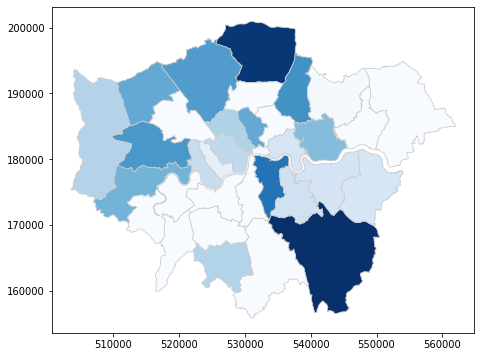

In [221]:
variable = 'count'

# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
tree_map.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')